INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpep8g3o79/t3vqro94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpep8g3o79/o5goomtw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66642', 'data', 'file=/tmp/tmpep8g3o79/t3vqro94.json', 'init=/tmp/tmpep8g3o79/o5goomtw.json', 'output', 'file=/tmp/tmpep8g3o79/prophet_model7_qb7cmu/prophet_model-20250416113814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:38:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:38:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Saving sales_data_sample.csv to sales_data_sample (2).csv


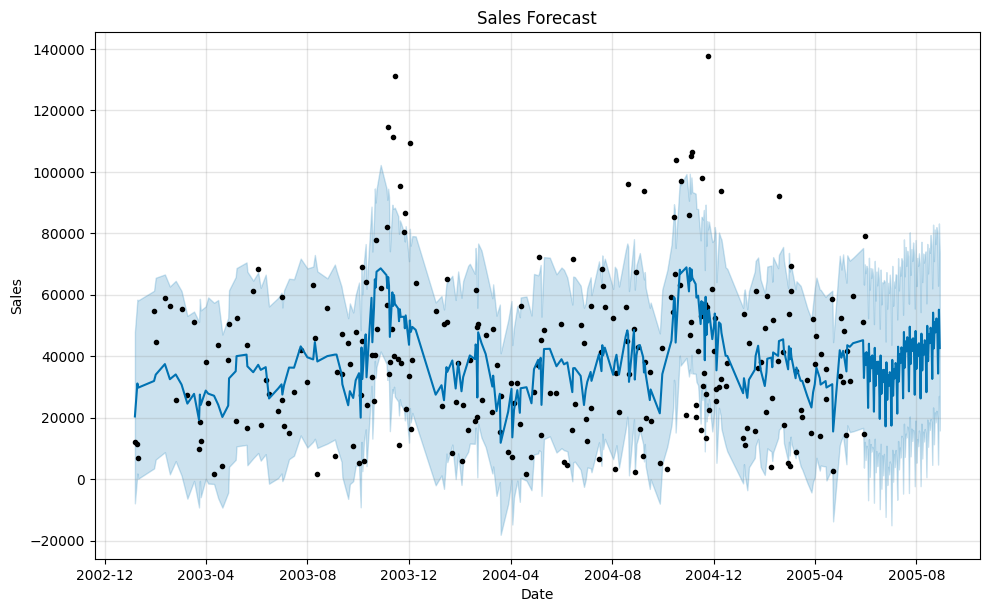

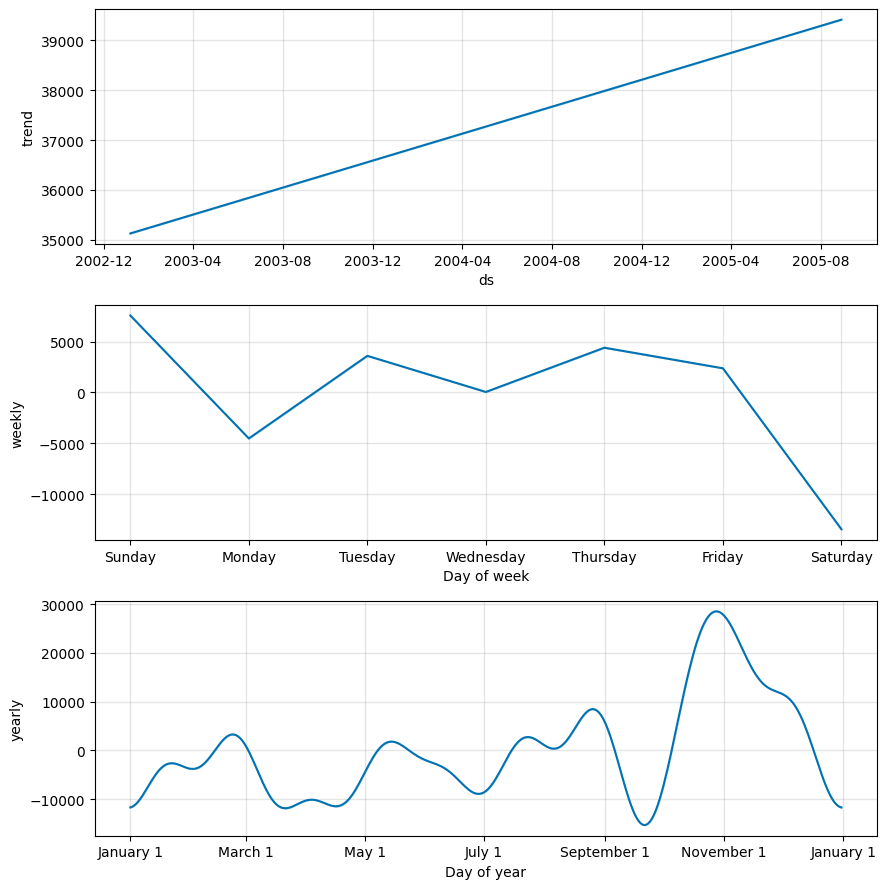

In [4]:

# !pip install prophet
from google.colab import files
uploaded = files.upload()
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
df = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

prophet_df = daily_sales.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})
model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
fig1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("sales_forecast.csv", index=False)
fig2 = model.plot_components(forecast)
plt.show()


In [3]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("sales_forecast.csv", index=False)
